# 데이터 가져오기

## 데이터 다운로드하기

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
    
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")

    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [3]:
housing = load_housing_data()

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 데이터 구조 훍어보기

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity 열의 값이 반복되는 것으로 보아, 이 특성은 아마도 범주형(categorical)일 것이다. value_counts() 메서드를 통해 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 확인한다.

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe() 메서드로 숫자형 특성의 요약 정보를 출력한다.

count, mean, min, max행은 각각 횟수, 평균, 최소, 최대값을 나타내며, 널값은 제외되었다.

std 행은 값이 퍼져있는 정도를 나타내는 표준 편차를 나타낸다. 

25%, 50%, 75% 행은 백분위수(percentile)를 나타낸다. 백분위수는 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타낸다.

25%는 제1사분위수(quartile), 50%는 중간값, 75%는 제3사분위수라고도 한다.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


데이터의 형태를 효율적으로 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다. 히스토그램은 주어진 값의 범위(x축)에 속한 샘플 수 (y축)을 나타낸다.

In [9]:
import matplotlib
import matplotlib.pyplot as plt


plt.rc('font', family="AppleGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
# 추가코드 - 고해상도 PNG 파일로 그래프를 저장하기 위한 코드
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

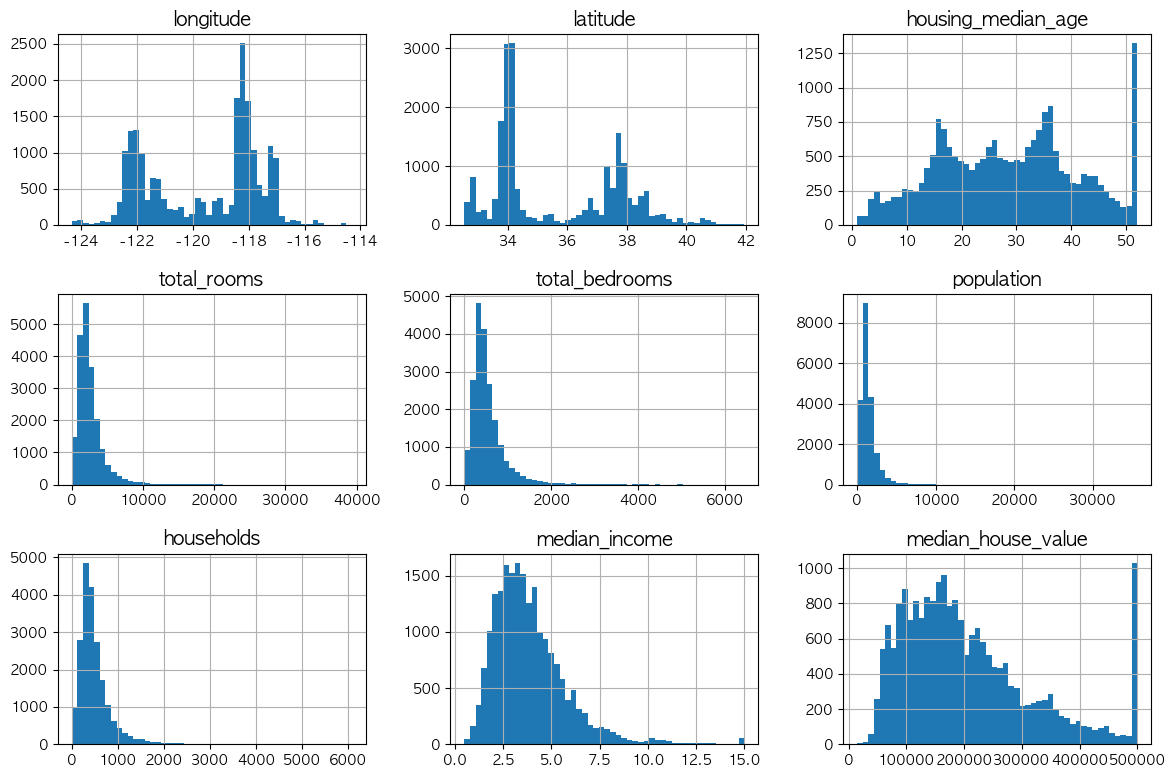

In [11]:
# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig('attribute_histogram_plots')
plt.show()

## 테스트 세트 만들기

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


위 코드는 실행될 때마다 다른 테스트 세트가 생성되는 문제가 있다. 이를 해결하는 방법은

- 처음 실행 시 테스트 세트를 저장하고 다음번 실행에서 이를 로드하는 방법
- 항상 같은 난수 인덱스가 생성되도록 난수 발생기의 초깃값을 지정하는 방법 (ex. np.random.seed(42))

하지만 이 해결책들도 새로 업데이트된 데이터셋을 사용할 때 문제가 된다. 업데이트 후에도 안정적인 훈련/테스트 분할이 가능하게 하는 일반적인 방법은 샘플의 식별자를 사용하여 테스트 세트로 선정하는 것이다. (각 샘플이 고유하고 변경 불가능한 식별자가 있다는 가정하에!)

In [14]:
from zlib import crc32

MAX_HASH_VALUE = 2**32

def is_id_in_test_set(identifier, test_ratio):
    # 식별자의 해시값이 해시 최대값의 test_ratio보다 작은 경우만 테스트 세트로 선정한다.
    return crc32(np.int64(identifier)) < test_ratio * MAX_HASH_VALUE

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# 해당 데이터 셋에는 식별자 컬럼이 없기 때문에, 행의 인덱스를 식별자로 사용한다.
housing_with_id = housing.reset_index()

In [16]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

행의 인덱스를 고유 식별자로 사용할 때,

- 새 데이터는 데이터셋의 끝에 추가되어야 한다.
- 어떤 행도 삭제되지 않아야 한다.

이것이 불가능할 때는 고유 식별자를 만드는 데 안전한 특성을 사용해야 한다.

In [17]:
# 구역의 위도와 경도 특성이 몇 백년 후에도 안정적이라는 가정이 있다면,
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

사이킷런은 데이터셋을 여러 서브셋(subset)으로 나누는 다양한 방법을 제공하며, 대표적인 함수가 train_test_split 이다.

이 함수는 다음과 같은 특징이 있는데,

- 난수 초깃값을 지정할 수 있는 random_state 매개변수가 있다.
- 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 동일한 인덱스를 기준으로 나눌 수 있다.
  - 예를 들어, dataframe이 레이블에 따라 여러 개로 나뉘어 있을 때 유용하다.

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set["total_bedrooms"].isnull().sum()

44

**추가 코드**

인구의 여성 비율이 51.1%일 때 1,000명으로 구성된 랜덤 샘플에서 여성이 48.5% 보다 작거나 53.3% 보다 많을 확률을 계산하려면 [이항 분포](https://en.wikipedia.org/wiki/Binomial_distribution)를 사용합니다. 이항 분포의 `cdf()` 메서드는 여성의 수가 주어진 값보다 작거나 같을 확률을 반환합니다.

In [20]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법

from scipy.stats import binom

# 전체 인구에서 1000명을 선택
sample_size = 1000
# 미국 인구의 51.1%가 여성
ratio_female = 0.511
# 1000명 중 샘플링을 했더니, 485명 미만으로 나올 확률
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
# 1000명 중 샘플링을 했더니, 535명 초과로 나올 확률
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)

print(proba_too_small + proba_too_large)

0.10736798530930056


In [21]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female)
samples

array([[ True, False, False, ...,  True, False,  True],
       [ True, False, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True, False],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ..., False, False,  True],
       [ True,  True, False, ...,  True, False,  True]])

In [22]:
samples = samples.sum(axis=1)
samples

array([515, 491, 511, ..., 522, 483, 496])

In [23]:
((samples < 485) | (samples > 535)).mean()

0.1071

중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다. 각 소득 계층별로 데이터셋에 충분한 샘플이 있어야 하며, 그렇지 않으면 계층의 중요도를 추정하는데 편향이 생긴다.

이 말은 계층을 너무 나눠서도 안되고, 나뉜 각 계층의 데이터셋도 충분히 커야한다는 뜻이다.

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

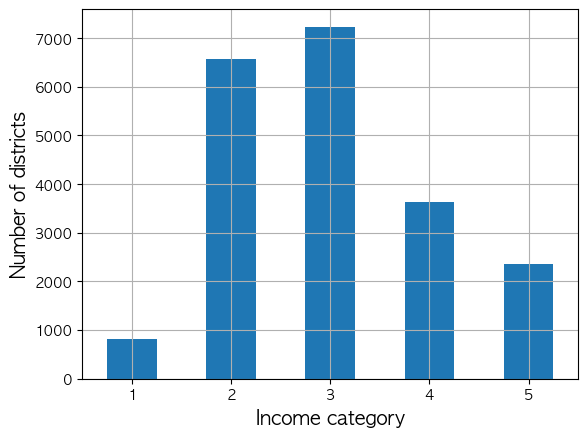

In [25]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [26]:
# 한 데이터 셋으로 각각 다른 10개의 계층적 샘플링을 생성

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [27]:
strat_train_set, strat_test_set = strat_splits[0]

In [28]:
strat_train_set.shape

(16512, 11)

In [29]:
strat_test_set.shape

(4128, 11)

In [30]:
# 계층적 샘플링은 자주 사용되기 때문에 하나의 분할이 필요한 경우
# train_test_split() 함수와 stratify 매개변수를 사용한다.

strat_train_set, start_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [31]:
# 테스트셋의 소득 카테고리 비율
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [32]:
# 전체 데이터셋과 계층 샘플링으로 만든 테스트셋에서 소득 카테고리 비율을 비교한 Dataframe
# 추가 코드 – 그림 2–10를 생성합니다.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [33]:
compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props

,Overall %,Stratified %,Random %
1,0.039826,0.039971,0.042393
2,0.318847,0.318798,0.307413
3,0.350581,0.350533,0.345203
4,0.176308,0.176357,0.184109
5,0.114438,0.114341,0.120882


In [34]:
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/var/folders/l1/chj_sq450dsfbc68_tm8rkyr0000gn/T/ipykernel_65090/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [36]:
"income_cat" in strat_train_set 

False

In [37]:
"income_cat" in strat_test_set

False

## 데이터 이해를 위한 탐색과 시각화

전체 훈련 세트에 대해서 다양한 변환을 실험하기 때문에 나중에 되돌릴 수 있도록 원본 데이터의 본사본을 만든다.

In [38]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


### 지리적 데이터 시각화하기

지리 정보(위도와 경도)가 포함되어 있으니 모든 구역을 산점도로 만들어 시각화해보면 좋다.

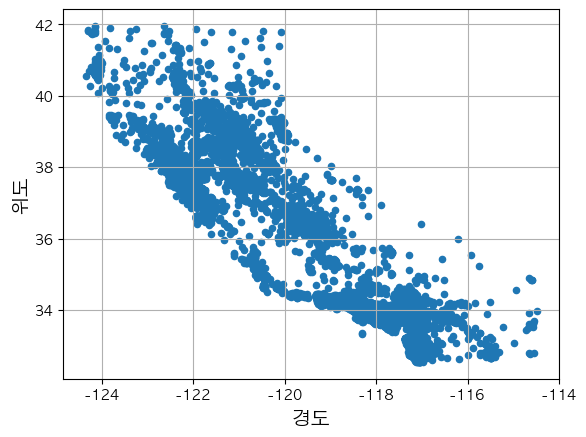

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

alpha 옵션을 주면, 데이터 포인트가 밀집된 영역을 잘 보여준다.

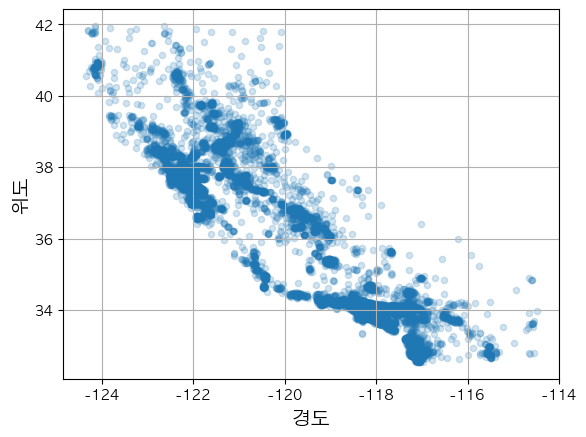

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

주택 가격을 시각화해보면,

- 원의 반지름은 구역의 인구를 나타내고(s),
- 색상은 가격을 나타내며(c),
- 파란색(낮은 가격)에서 빨간색(높은 가격)로 나타난다.

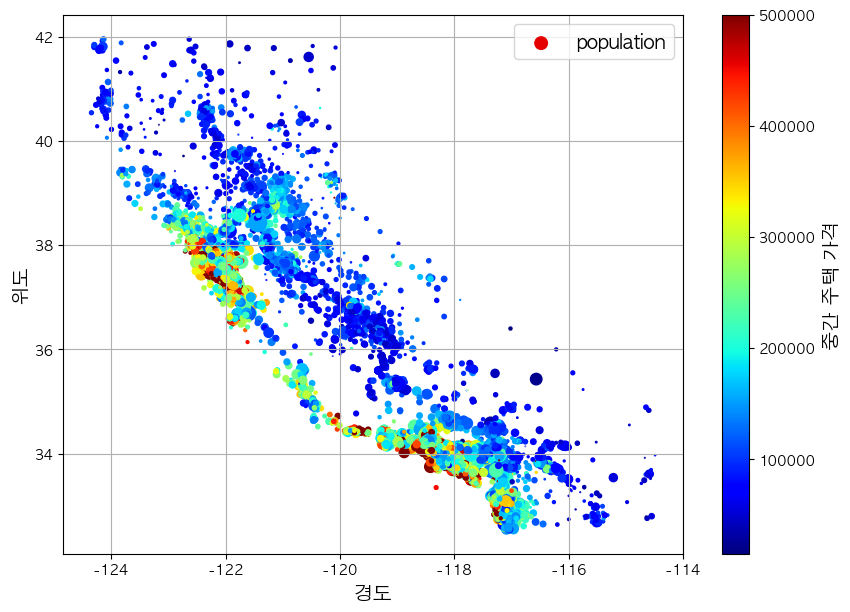

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

In [42]:
# 추가 코드 – 이 셀은 이 장의 첫 번째 그림을 생성합니다

# 캘리포니아 이미지를 다운로드합니다
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

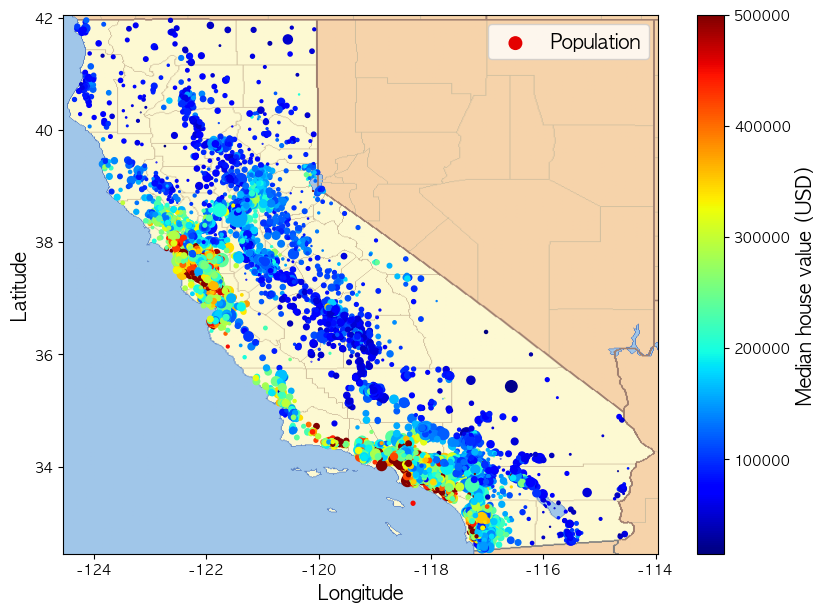

In [43]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (USD)"})
housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude",
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Median house value (USD)", cmap="jet", colorbar=True,
                     legend=True, figsize=(10, 7))
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

그림을 보면, 주택 가격은 지역(ex 바다와 인접한 곳) 및 인구 밀도와 관련성이 높은 사실을 알 수 있다.

군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있다. 해안 근접성 특성이 유용할 수도 있지만 북부 캘리포니아 지역의 해안가는 주택 가격이 그리 높지 않으므로 이런 특성을 적용하기는 살짝 어렵다.

### 상관관계 조사하기

In [44]:
import pandas as pd
import numpy as np

데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수(standard correlation coefficient)를 계산해본다.

상관관계의 범위는 -1 ~ 1까지입니다. 

- 1에 가까우면 강한 양의 상관관계를 가진다.
- -1에 가까우면 강한 음의 상관관계를 가진다.
- 0에 가까우면 선형적인 상관관계가 없다는 뜻이다.

In [45]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

특성 사이의 상관관계를 확인하는 다른 방법는 scatter_matrix 함수를 사용해, 숫자형 특성 간 산점도를 그려보는 것이다.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

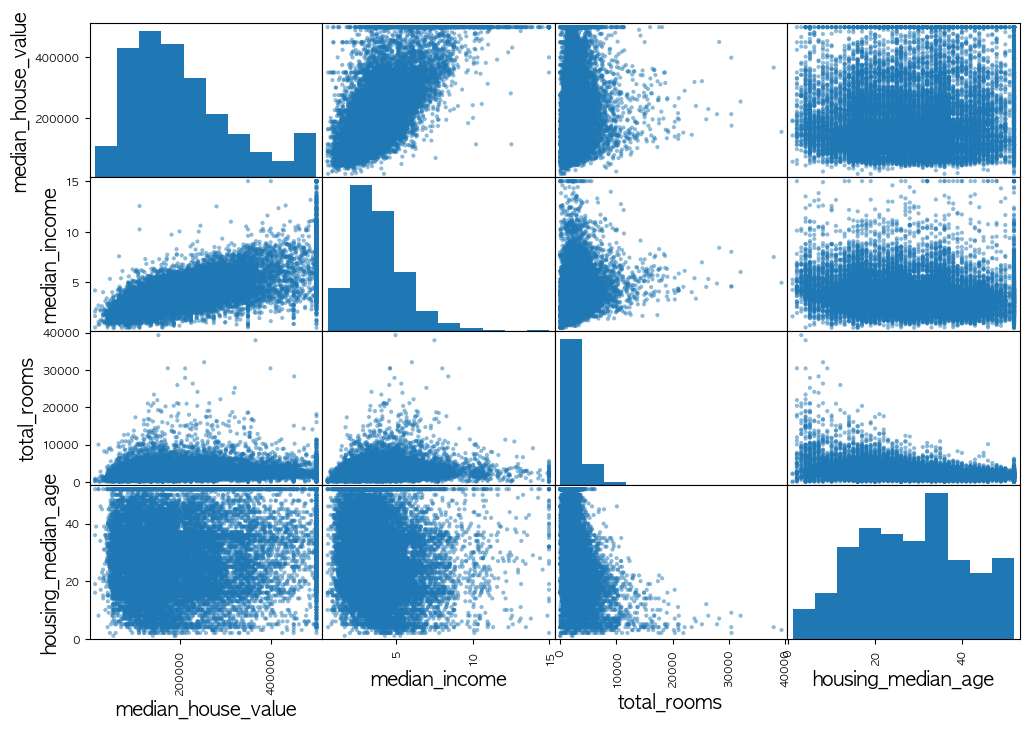

In [46]:
from pandas.plotting import scatter_matrix

# 중간 주택 가격과 상관관계가 높아 보이는 특성 몇개만 살펴보기
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

이 산점도 행렬은 수치형 특성 간 산점도와 각 수치형 특성의 히스토그램(대각선)을 출력한다.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

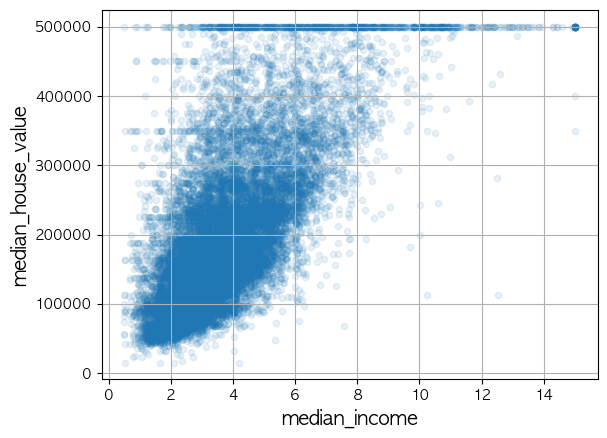

In [47]:
# 산점도 행렬을 보면 중간 주택 가격을 예측하는데 중간 소득이 가장 유용해 보인다.

housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1, 
             grid=True)

위 그래프를 살펴보면,

1. 상관관계가 매우 강하다. 위쪽으로 향하는 경향이 있으며 데이터 포인트들이 너무 많이 퍼져있지 않다.
2. 가격의 한계값이 $500,000에서 수평선으로 잘 보인다. 근데 이 그래프에는 직선에 가까운 형태가 몇 군데 더 나타난다. 이런 경우 알고리즘이 데이터에서 이런 이상한 행태를 학습하지 않도록 해당 구역을 제거할 수 있다.

### 특성 조합으로 실험하기

데이터를 알고리즘에 주입하기 전,

- 정제해야 할 이상한 데이터를 확인하고,
- 특성 사이에서 상관관계(특히 타깃과의 상관관계)를 발견하고,
- 특성의 분포가 한 쪽(왼쪽 혹은 오른쪽)의 꼬리가 길다면, 로그함수나 제곱근을 적용해 데이터를 변형할 수도 있다.

마지막으로 주어진 특성들을 조합해 더 유용한 특성을 새롭게 정의하는 것도 좋다.

- 특정 구역의 방 개수는 가구 수를 모른다면 그다지 유용하지 않음 -> 가구당 방 개수
- 전체 침실 개수도 그다지 유용하지 않음 -> 방 개수 대비 침실 개수 비율
- 가구당 인원

In [48]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]

In [49]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_ratio         -0.256397
Name: median_house_value, dtype: float64

## 머신러닝 알고리즘을 위한 데이터 준비

훈련 세트에서 예측 변수와 타깃값에 동일한 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리한다.

In [50]:
# drop()은 기본적으로 데이터 복사본을 만들어 반환하기 때문에 
# 기존 객체에는 영향을 주지 않는다. 즉, Immutable하게 처리한다.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [51]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [52]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

### 데이터 정제

대부분의 머신러닝 알고리즘은 누락된 특성을 다루지 못하므로 이에 대한 처리가 선행되어야 한다. `total_bedrooms` 특성으로 예를 들면,

1. 해당 구역을 제거한다.
2. 전체 특성을 제거한다.
3. 누락된 값을 어떤 값(0, 평균, 중간값 등)으로 채운다. 이를 대체(imputation)이라 한다.

In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [54]:
null_rows_idx = housing.isnull().any(axis=1)
null_rows_idx

13096    False
14973    False
3785     False
14689    False
20507    False
         ...  
14207    False
13105    False
19301    False
19121    False
19888    False
Length: 16512, dtype: bool

In [55]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [56]:
# 1. 해당 구역(데이터)을 제거한다.
option1 = housing.copy()
option1.dropna(subset=["total_bedrooms"], inplace=True)
option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [57]:
# 2. 전체 특성을 제거한다.
option2 = housing.copy()
option2.drop("total_bedrooms", axis=1, inplace=True)
option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [58]:
# 3. 누락된 값을 중간값으로 채운다.
option3 = housing.copy()
median = housing["total_bedrooms"].median()
option3["total_bedrooms"].fillna(median, inplace=True)
option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


사이킷런의 SimpleImputer 클래스는 각 특성의 중간값을 저장하고 있어 유용하다. 이 클래스를 사용하면 훈련 세트뿐만 아니라 검증 세트와 테스트 세트 그리고 모델에 새로 주입될 데이터에 있는 결측치을 대체할 수도 있다.

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중간값은 수치형 특성에만 적용되기 때문에 수치형 특성만을 가진 데이터 셋이 필요하다.

In [60]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


imputer 객체의 fit() 메서드를 사용해 훈련 데이터에 적용할 수 있으며, 각 특성의 중간값 결과는 `statistics_`속성을 통해 확인할 수 있다.

In [61]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

현재 훈련 세트에는 `total_bedrooms` 특성에서만 누락이 있지만, 추후 새로운 시스템에서 어떤 값이 누락될지 확신할 수 없기 때문에 모든 수치형 특성에 imputer를 적용하는 것이 좋다.

In [62]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [63]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있다.

누락된 값을 평균(`strategy="mean"`)이나 최빈값(`strategy="most_frequent"`) 또는 상수(`strategy="constant", fill_value=...`)로 바꿀 수도 있으며, 마지막 두 방법은 수치가 아닌 데이터도 지원한다.

In [64]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

현재 훈련 세트에는 `total_bedrooms` 특성에서만 누락이 있지만, 추후 새로운 시스템에서 어떤 값이 누락될지 확신할 수 없기 때문에 모든 수치형 특성에 imputer를 적용하는 것이 좋다.

In [65]:
# 사이킷런의 transformer는 넘파일 배열(혹은 sparse matrix)를 반환한다.
# 따라서 이를 적절히 DataFrame으로 변환해서 사용한다.
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [66]:
imputer.strategy

'median'

### 텍스트와 범주형 특성 다루기

In [67]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


대부분의 머신러닝 알고리즘은 숫자를 다루기 때문에 범주형 특성을 숫자로 변환한다.

In [68]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

`categories_` 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있으며, 범주형 특성마다 1차원 배열로 이루어진 리스트가 반환된다.

In [69]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

위와 같은 표현했을 경우, 머신러닝 알고리즘이 가까이 있는 두 값을 서로 떨어져 있는 두 값보다 더 비슷하다고 판단하는 것이 문제다.

순서가 있는 카테고리라면(ex. `bad`, `average`, `good`, `excellent`) 괜찮지만, `ocean_proximity` 특성은 해당되지 않는다.

이러한 문제는 일반적으로 카테고리별 이진 특성을 만들어 해결하며, 이 때 사용하는 것이 원-핫 인코딩(one-hot encoding)이다. 때로는 이런 특성을 더미(dummy)특성이라도 부른다.

In [70]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
# 희소 행렬(sparse matrix)를 반환함.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`OneHotEncoder`는 기본적으로 희소 행렬을 반환한다. `toarray()`메서드를 사용하면 밀집 배열로 변환할 수 있다.

In [71]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [72]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [73]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

판다스에도 범주형 특성을 원-핫 표현으로 바꿔서 카테고리마다 하나의 이진 특성을 만드는 `get_dummies()`함수도 있다.

In [74]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [75]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

OneHotEncoder vs get_dummies()

- OneHotEncoder는 학습한 카테고리들을 기억하고 있기 때문에, 데이터가 일부의 카테고리만 표현하고 있어도 학습된 카테고리마다 하나의 열을 순서대로 표현한다.
- 반면, get_dummies()는 일부의 카테고리만 보았기 때문에 그 일부만 열로 출력한다.
- 알 수 없는 카테고리를 담은 데이터가 있는 경우, get_dummies()는 아무런 에러없이 결과를 출력한다.
- 반면 OneHotEncoder는 학습한 카테고리 외의 알 수 없는 카테고리가 있는 경우, 이를 감지하고 예외를 발생시킨다. 

모델을 제품에 실 적용할 때 훈련때와 완전히 동일한 특성이 주입되어야 하는 것이 중요하기 때문에, OneHotEncoder가 훨씬 이점이 많다.

In [76]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "NEAR BAY"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [77]:
try:
    cat_encoder.transform(df_test_unknown)
except ValueError as e:
    print(e)

Found unknown categories ['<2H OCEAN'] in column 0 during transform


In [78]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**TIP**

범주형 특성의 카테고리 수가 너무 많다면, 원-핫 인코딩은 많은 수의 입력 특성을 만들어서 훈련 속도를 느리게하고 성능을 감소시킬 수 있다.

이를 해결하기 위한 방법으로는
- 범주형 특성을 이 특성과 관련된 숫자형 특성으로 변환하는 방법
    - `ocean_proximity` 특성을 해안까지의 거리로 변환하는 등
- 신경망을 사용해 각 카테고리를 임베딩(embedding)이라 부르는 학습 가능한 저차원 벡터로 변환한 방법
    - 이를 표현 학습(representation learning)의 한 예이다.

In [79]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [80]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [81]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


### 특성 스케일과 변환

몇 가지를 제외하고(ex. 트리 알고리즘) 머신러닝 알고리즘은 입력한 숫자 특성들의 스케일이 많이 다르면 제대로 작동하지 않는다. 전체 방의 개수의 범위는 6 ~ 39,320인 반면 중간 소득의 범위는 0~15이다. 이 때 스케일링을 적용하지 않으면 대부분의 모델은 중간 소득을 무시하고 방 개수에 더 초점을 맞출 것이다.

모든 특성 범위를 같게 만들어주는 대표적인 방법은

- min-max 스케일링
- 표준화(standardization)

**CAUTION**

모든 estimator와 마찬가지로 스케일리은 훈련 데이터로만 학습을 수행해야 한다. 즉, 훈련 세트 이외의 어떤 데이터셋에도 `fit()`이나 `fit_transform()`메서드를 사용해서는 안된다.

min-max 스케일링은 각 특성에 대해 0 ~ 1범위에 속하도록 값을 이동하고 스케일을 조정한다. 변환될 값의 범위가 꼭 0 ~ 1일 필요는 없다. 예를 들어 신경망은 평균이 0인 데이터에서 잘 동작하기 때문에 -1 ~ 1 사이의 범위가 선호된다.

훈련 세트 값은 항상 특정 범위로 스케일링되지만, 새로운 데이터에 이상치가 있다면 그 범위 밖으로 스케일링된다. 

해당 방식은 표준화 방식에 비해 이상치에 민감하다.

In [82]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [83]:
housing_num_min_max_scaled[:5]

array([[-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
        -0.80701754, -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, -0.90014752, -0.88629409,
        -0.91866029, -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, -0.94501246, -0.93042358,
        -0.93141946, -0.92458466, -0.73336919],
       [ 0.46855984, -0.74468085, -0.37254902, -0.78778168, -0.7262039 ,
        -0.77401546, -0.70916558, -0.75698266],
       [ 0.25760649, -0.74042553,  0.37254902, -0.77801516, -0.6102432 ,
        -0.76579561, -0.56281501, -0.58217128]])

In [84]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [85]:
housing_num_std_scaled[:5]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.35909429,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43635598,
        -0.69377062, -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.75958421,
        -0.78876841, -0.77572662, -0.75978881],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.73623112,
         0.38317548,  0.73137454, -0.85028088],
       [ 0.71136206, -0.87554898,  0.58980003,  0.79012465,  1.58558998,
         0.44437597,  1.75526303, -0.18036472]])

특성을 스케일링하기 전에 두꺼운 꼬리(한 쪽으로 치우친 분포를 의미하는 듯...)를 줄이도록 데이터를 먼저 변환하고 분포가 대략적으로 대칭이 되도록 만들어야 한다.

- 특성을 제곱근으로 바꾸는 방법
- 0 ~ 1사이에서 특성을 거듭제곱하는 방법
- 특성을 로그값으로 바꾸는 방법 (ex. 분포가 멱법칙 분포처럼 나타나는 경우)

특성 분포의 꼬리가 두꺼우면(== 평균에서 멀리 떨어진 값이 지수적으로 줄어들지 않는 경우), min-max 스케일링과 표준화는 대부분의 값을 작은 범위로 압축하는데, 이런 값들은 머신러닝 모델에 적합하지 않는다.

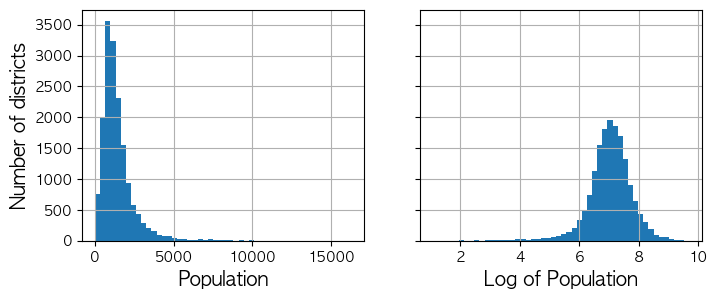

In [86]:
# 추가코드 - 그림 2-17을 생성한다.
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of Population")
axs[0].set_ylabel("Number of districts")
plt.show()

꼬리가 두꺼운 특성을 처리하는 또 다른 방법은 버킷타이징(bucketizing)하는 것이다.
분포를 거의 동일한 크기의 버킷으로 자르고, 각 특성값을 해당하는 버킷의 인덱스로 변환한다.

각 값을 백분위 수로 바꿔서 거의 동일한 크기의 버킷을 사용하면 거의 균등한 분포인 특성을 만들 수 있다. 이를 버킷 개수로 나누어 0 ~ 1 사이 범위로 만들 수도 있다.

In [87]:
# 추가코드 - 중간 소득에 대한 균등분포를 보여준다. (버킷타이징 bucketizing)
percentiles = [np.percentile(housing["median_income"], p) for p in range(1, 100)]

In [88]:
flattend_median_income = pd.cut(housing["median_income"],
                                bins=[-np.inf] + percentiles + [np.inf],
                                labels=range(1, 100 + 1))
flattend_median_income

13096    14
14973    90
3785     22
14689    18
20507    50
         ..
14207    75
13105    26
19301    63
19121    65
19888    45
Name: median_income, Length: 16512, dtype: category
Categories (100, int64): [1 < 2 < 3 < 4 ... 97 < 98 < 99 < 100]

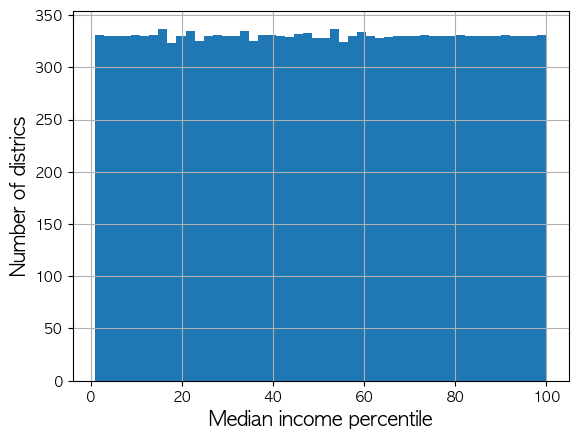

In [89]:
flattend_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districs")
plt.show()

멀티모달 분포(multimodal distribution, 다봉분포)는 모드(mode)라 부르는 정점(봉)이 두 개 이상 나타나는 분포를 의미하는데, 이를 (대략적인 종모양으로) 변환할 때 버킷타이징이 도움될 수 있다.

이 때 각 버킷의 인덱스를 카테고리로써 다뤄야 하며, 원-핫 인코딩같은 방식을 사용해 버킷 인덱스를 인코딩해야 한다. 이런 방법을 사용하면 회귀 모델이 특성값의 여러 범주에 대해서 다양한 규칙을 쉽게 학습할 수 있다.

멀티모달 분포를 변환하는 또 다른 방법은 중 하나는 특성(여기서는 중간 주택 연도)과 특정 모드 사이의 유사도를 나타내는 특성을 추가하는 것이다. 유사도는 방사 기저 함수(RBF, radial basis function)을 사용해 입력값과 고정 포인트 사이의 거리(유사도)를 계산한다.

보통 사용되는 RBF는 입력값이 고정 포인트(특정 모드)에서 멀어질수록 출력값이 지수적으로 감소하는 가우스 RBF이다. 이 때, 하이퍼파라미터 감마는 입력값이 고정포인트에서 멀어짐에 따라 유사도 값이 얼마나 빠르게 감소하는지 결정한다.

In [90]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [91]:
# 추가 코드 - 중간 주택 가격과 35 사이의 유사도를 재는 가우스 RBF 특성을 나타내는 그래프

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500)
ages = ages.reshape(-1, 1)
ages

array([[ 1.        ],
       [ 1.10220441],
       [ 1.20440882],
       [ 1.30661323],
       [ 1.40881764],
       [ 1.51102204],
       [ 1.61322645],
       [ 1.71543086],
       [ 1.81763527],
       [ 1.91983968],
       [ 2.02204409],
       [ 2.1242485 ],
       [ 2.22645291],
       [ 2.32865731],
       [ 2.43086172],
       [ 2.53306613],
       [ 2.63527054],
       [ 2.73747495],
       [ 2.83967936],
       [ 2.94188377],
       [ 3.04408818],
       [ 3.14629259],
       [ 3.24849699],
       [ 3.3507014 ],
       [ 3.45290581],
       [ 3.55511022],
       [ 3.65731463],
       [ 3.75951904],
       [ 3.86172345],
       [ 3.96392786],
       [ 4.06613226],
       [ 4.16833667],
       [ 4.27054108],
       [ 4.37274549],
       [ 4.4749499 ],
       [ 4.57715431],
       [ 4.67935872],
       [ 4.78156313],
       [ 4.88376754],
       [ 4.98597194],
       [ 5.08817635],
       [ 5.19038076],
       [ 5.29258517],
       [ 5.39478958],
       [ 5.49699399],
       [ 5

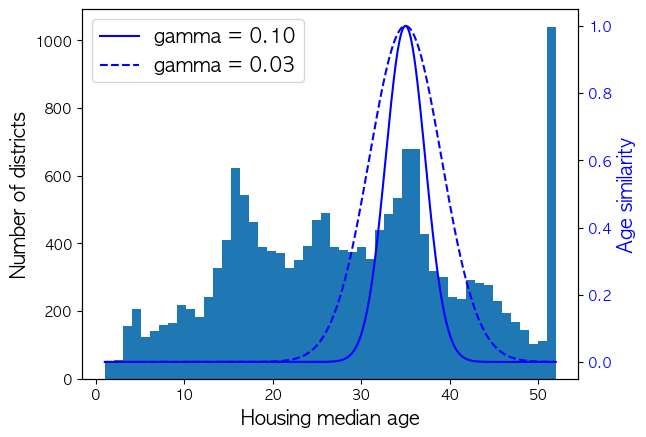

In [92]:
# 입력값이 고정 포인트에서 멀어짐에 따라 유사도 값이 얼마나 빠르게 감소하는지 결정
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx() # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

입력 특성 뿐만 아니라 타깃값도 변환이 필요할 수 있다. 만약 타킷값의 분포가 두꺼운 꼬리를 가진다면 타깃을 로그값으로 변환할 수 있다. 이 때 놓치지 말아야 하는 점은 예측값을 다시 역변환(이 경우 지수함수를 적용)해야 제대로된 예측값을 얻을 수 있다.

In [93]:
from sklearn.linear_model import LinearRegression

# 타깃값인 레이블을 스케일링(표준화)한다.
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# 간단한 선형 회귀 모델을 훈련하고 새로운 데이터에서 예측을 만든다.
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]

# 레이블을 스케일링했기 때문에 이를 역변환해야 제대로된 예측값을 얻을 수 있다.
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [94]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [95]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [96]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### 사용자 정의 변환기

어떤 훈련도 필요하지 않는 변환의 경우, (넘파일 배열과 같은)입력을 받고 변환된 값을 출력하는 함수를 작성하면 되는데, 이 때 `FunctionTransforer` 클래스를 사용한다.

In [100]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

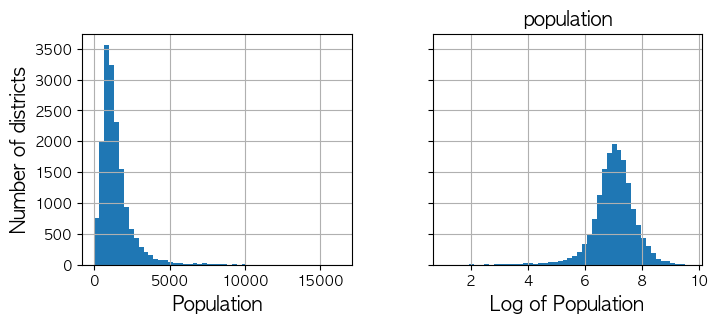

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
log_pop.hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of Population")
axs[0].set_ylabel("Number of districts")
plt.show()

RBF 커널은 고정포인트에서 일정 거리만큼 떨어진 값이 (거리가 0일 때를 제외하고) 항상 두 개이기 때문에 역함수가 없다.

In [106]:
rbf_transfromer = FunctionTransformer(rbf_kernel, 
                                       kw_args={"Y": [[35.]], "gamma": 0.1})
age_simil_35 = rbf_transfromer.transform(housing[["housing_median_age"]])

In [107]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

두 개의 특성을 가진 배열을 전달하면 유사도를 측정하기 위해 유클리드 거리를 계산한다.

In [108]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                    kw_args=dict(Y=[sf_coords], gamma=0.1))

# 각 구역과 샌프란시스코 사이의 지리적 유사도를 측정하는 특성
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

여러 특성을 합칠 때도 유용하다.

In [117]:
arr = np.array([[1., 2.], [3., 4.]])
arr[:, [0]], arr[:, :1], arr[:, 0]

(array([[1.],
        [3.]]),
 array([[1.],
        [3.]]),
 array([1., 3.]))

In [109]:
# 첫 번째 입력 특성과 두 번째 특성 사이의 비율을 나타내는 특성
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

`FunctionTransformer`는 편리하지만 별도의 학습을 지원하지 않는다. 훈련 가능한 변환기가 필요하다면 별도의 사용자 정의 클래스를 작성해야 한다.

필요한 것은 `fit()`, `transform()`, `fit_transform()` 세 개의 메서드 구현이다.

In [118]:
# StandardScaler와 비슷하게 작동하는 사용자 정의 Transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    # *args, **kwargs를 사용하지 않는다.
    # BaseEstimator를 사용하고 생성자 인수로 가변인수들을 정의하지 않으면,
    # 하이퍼파라미터에 튜닝에 필요한 get_params, set_params 메소드를 추가로 얻는다. 
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        
    # 사용하지 않더라도 y를 정의해야 한다.
    def fit(self, X, y=None):
        # X가 부동소수점 배열인지 확인한다.
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        # 모든 사이킷런 Estimator는 fit() 메서드 안에서 n_features_in_을 설정한다.
        # 그리고 transform(), predict() 메서드에 전달된 데이터의 특성 개수가 동일한지 검사한다.
        self.n_features_in_ = X.shape[1]
        # 항상 self를 반환한다.
        return self
        
    def transform(self, X):
        # (훈련으로) 학습된 속성이 있는지 확인한다.
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

하나의 사용자 Transformer가 구현 안에서 다른 Estimator를 사용할 수 있다.

In [131]:
from sklearn.cluster import KMeans

# fit() 안에서 훈련 데이터에 있는 핵심 클러스터를 식별하기 위해 KMeans 클래스를 사용하는 사용자 변환기
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
        
    def transform(self, X):
        # 각 샘플이 클러스터 중심과 얼마나 유사한지 RBF 커널을 사용해 측정한다.
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [133]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [136]:
from sklearn.utils.estimator_checks import check_estimator

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
# k-평균으로 클러스터를 찾고 각 구역과 10개의 클러스터 중심 사이의 가우스 RBF 유사도를 측정한다.
# 이 때, 중간 주택 가격이 가중치로 부여되었다.
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [137]:
# 구역이 하나의 행이고 클러스터가 하나의 열인 행렬이 만들어 진다.
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

In [138]:
similarities.shape

(16512, 10)

그림 2-19에서, 구역의 색은 가장 가까운 클러스 중심과의 지리적 유사도에 따라 지정되었다. 대부분의 클러스는 인구가 많고 값 비싼 지역에 위치해 있다.

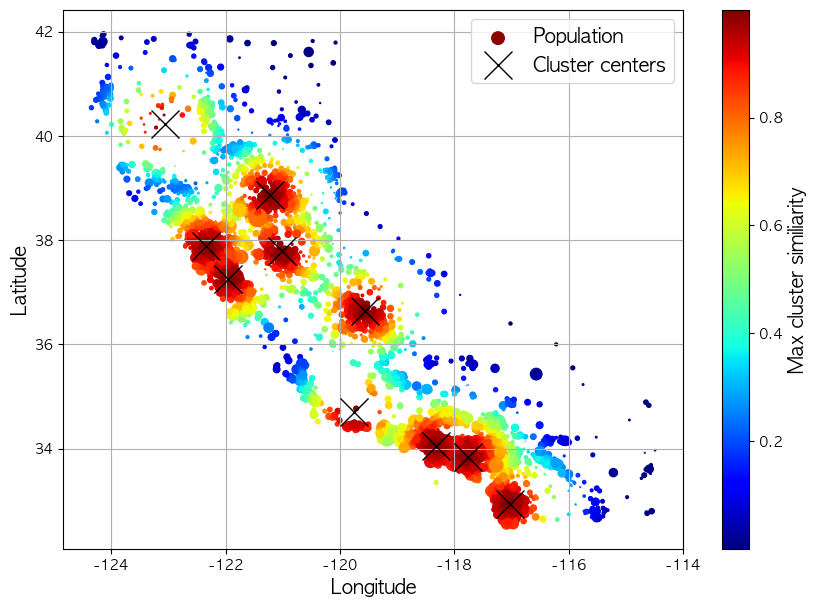

In [139]:
# 추가 코드 - 그림 2-19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (USD)"})
housing_renamed["Max cluster similiarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similiarity", cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="x", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### 변환 파이프라인